In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import random

2022-06-02 21:00:27.583947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-02 21:00:27.583999: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_path = 'CA2 jithin_3/newimages'
test_path = 'test'
resol = 64

## Processing the images

In [3]:
def process(img_path, resol):
    fruits = ['apple', 'banana', 'orange', 'mixed']
    one_hot = {
        'apple': [1, 0, 0, 0],
        'banana': [0, 1, 0, 0],
        'orange': [0, 0, 1, 0],
        'mixed': [0, 0, 0, 1]}

    train_label = []

    for fruit in fruits:
        count = 0
        for file_name in os.listdir(img_path):
            if file_name[0:len(fruit)] == fruit:
                img_raw = cv2.imread(img_path + '/' + file_name)
                img_rbg = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
                img_tiny = cv2.resize(img_rbg, (resol, resol))
                train_label.append([img_tiny, one_hot[fruit]])
                count += 1

        print(f'{fruit} count: {count}')

    random.shuffle(train_label)
    
    x_train = [i[0] for i in train_label]
    y_train = [i[1] for i in train_label]

    return np.array(x_train), np.array(y_train)


x_train, y_train = process(train_path, resol)
print(x_train.shape)

apple count: 600
banana count: 568
orange count: 576
mixed count: 580
(2324, 64, 64, 3)


/home/marcus/anaconda3/envs/tensor/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


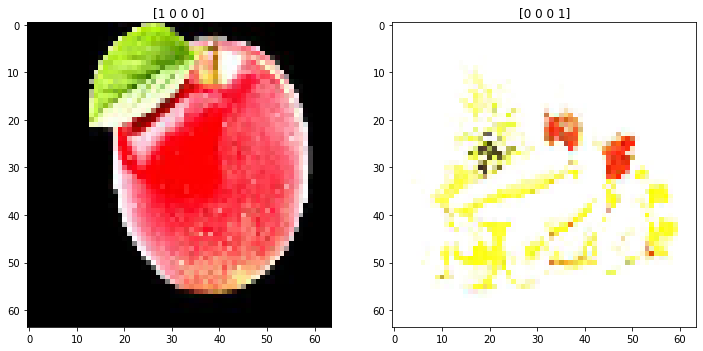

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].imshow(x_train[0])
ax[0].set_title(y_train[0])
ax[1].imshow(x_train[100])
ax[1].set_title(y_train[100])

plt.show()

## Construct CNN model

In [5]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=30,
                                 kernel_size=(3, 3),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(resol, resol, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                                 
model.add(tf.keras.layers.Conv2D(filters=30,
                                 kernel_size=(3, 3),
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=30,
                                 kernel_size=(3, 3),
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=30,
                                 kernel_size=(3, 3),
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 30)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 30)         0

2022-06-02 21:01:24.913791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-02 21:01:24.920926: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/marcus/anaconda3/envs/tensor/lib/python3.10/site-packages/cv2/../../../../lib:
2022-06-02 21:01:24.921201: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/marcus/anaconda3/envs/tensor/lib/python3.10/site-packages/cv2/../../../../lib:
2022-06-02 21:01:24.921485: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynami

## Train model

In [6]:
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=20, fill_mode='nearest',
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=False,
#     vertical_flip=False,
#     zoom_range=0.2)

# hist = model.fit(datagen.flow(x_train/255, y_train, seed=1), batch_size=30, epochs=50, shuffle=True, verbose=2)

In [7]:
hist = model.fit(x_train/255, y_train, batch_size=30, epochs=25, shuffle=True, verbose=2)

Epoch 1/25
78/78 - 4s - loss: 1.0818 - accuracy: 0.4927 - 4s/epoch - 53ms/step
Epoch 2/25
78/78 - 3s - loss: 0.4666 - accuracy: 0.8322 - 3s/epoch - 40ms/step
Epoch 3/25
78/78 - 3s - loss: 0.3169 - accuracy: 0.9032 - 3s/epoch - 41ms/step
Epoch 4/25
78/78 - 3s - loss: 0.2331 - accuracy: 0.9277 - 3s/epoch - 41ms/step
Epoch 5/25
78/78 - 3s - loss: 0.1526 - accuracy: 0.9565 - 3s/epoch - 40ms/step
Epoch 6/25
78/78 - 3s - loss: 0.1069 - accuracy: 0.9621 - 3s/epoch - 44ms/step
Epoch 7/25
78/78 - 3s - loss: 0.1190 - accuracy: 0.9583 - 3s/epoch - 42ms/step
Epoch 8/25
78/78 - 3s - loss: 0.1167 - accuracy: 0.9604 - 3s/epoch - 42ms/step
Epoch 9/25
78/78 - 4s - loss: 0.0866 - accuracy: 0.9763 - 4s/epoch - 45ms/step
Epoch 10/25
78/78 - 3s - loss: 0.0828 - accuracy: 0.9733 - 3s/epoch - 43ms/step
Epoch 11/25
78/78 - 3s - loss: 0.0449 - accuracy: 0.9871 - 3s/epoch - 43ms/step
Epoch 12/25
78/78 - 3s - loss: 0.1479 - accuracy: 0.9497 - 3s/epoch - 42ms/step
Epoch 13/25
78/78 - 3s - loss: 0.0698 - accuracy:

KeyboardInterrupt: 

## Test CNN model and perform evaluation

In [ ]:
x_test, y_test = process(test_path, resol)

loss, accuracy = model.evaluate(x=x_test/255, y=y_test)

print('loss =', loss)
print('accuracy =', accuracy)

apple count: 19
banana count: 18
orange count: 18
mixed count: 5
2/2 [==============================] - 0s 30ms/step - loss: 0.6429 - accuracy: 0.9000
loss = 0.6429354548454285
accuracy = 0.8999999761581421


: 

## Plot Loss & Accuracy

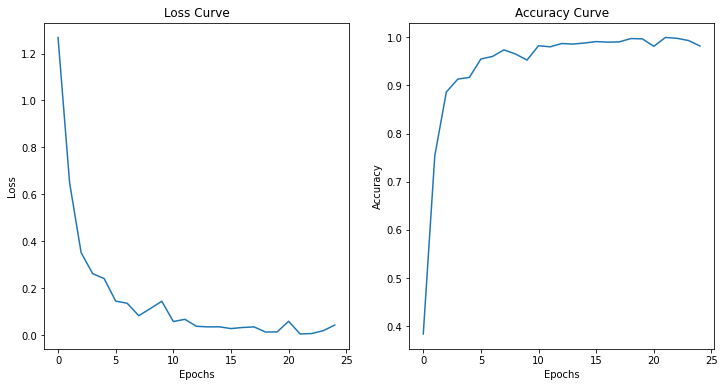

: 

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()